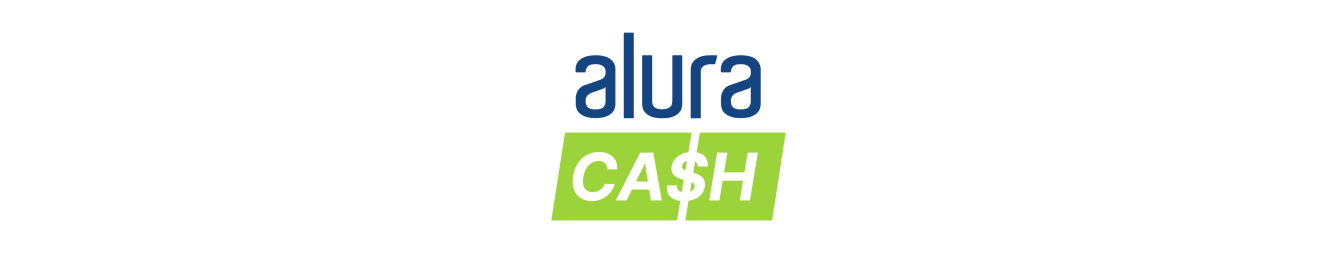

Somos uma equipe de dados que foi contratada para fazer parte do banco digital internacional chamado Alura Cash. No primeiro dia, a diretoria financeira nos convocou para uma reunião para informar que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos.

Por conta disso, foi solicitada uma solução para diminuir as perdas financeiras geradas por pessoas mutuárias que não quitam suas dívidas. Nos foi informado também que teríamos o prazo de um mês para encontrar essa solução e apresentá-la à diretoria financeira. Sendo assim, solicitamos um conjunto de dados contendo as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuária é inadimplente ou não.

### Semana 1
A semana 1 é dedicada à análise e estruturação dos dados oferecidos pelo banco com MySQL. Primeiro, foi notado que os dados estavam diferentes dos usuais, pois sua fonte era um dump, o que nos exigiu uma atenção especial na manipulação deles. Assim, buscamos ler todo o registro para entender nossos dados. Notamos que os valores estavam divididos por tabelas características, com valores de ID referenciando os dados de cada cliente.

Então, iniciamos analisando as informações que o conjunto de dados possuía. Observamos que os dados estavam em inglês, os valores de texto estavam sem padronização, além de vários valores nulos.

Foi percebida também a existência de uma tabela que continha a relação de todos os IDs de uma mesma pessoa cliente do Alura Cash. Dessa forma, o primeiro passo foi tratar nossos dados para deixá-los padronizados no texto, bem como, corrigir inconsistências relacionadas ao tipo e estruturação deles.

Depois buscamos unir as tabelas pelos valores de IDs que eram correspondentes entre si, deixando todos os dados em uma única tabela de dados de clientes. Após uma conversa entre a equipe, decidimos não eliminar os valores nulos dentro do banco de dados, pois poderiam conter informações de clientes que são importantes para o banco.

A tabela de dados unidos foi exportada do MySQL como csv e será utilizada nas próximas semanas.

### Sobre o mês do desafio

Você foi contratado(a) como pessoa cientista de dados para trabalhar em um banco digital internacional chamado Alura Cash. Na primeira reunião do seu novo trabalho, a diretoria financeira informa que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos. Portanto, é solicitada uma solução para que seja possível diminuir as perdas financeiras por conta de pessoas mutuarias que não quitam suas dívidas.

Como cientista de dados, você sugere um estudo das informações financeiras e de solicitação de empréstimo para encontrar padrões que possam indicar uma possível inadimplência.

Desse modo, você solicita um conjunto de dados que contenha as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuaria é inadimplente ou não. Com esses dados, você sabe que consegue modelar um classificador capaz de encontrar potenciais clientes inadimplentes e solucionar o problema do Alura Cash.

## Dicionário de dados por tabela

### dados_mutuarios

Tabela contendo os dados pessoais de cada solicitante

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
| `person_age` | Idade da pessoa - em anos - que solicita empréstimo |
| `person_income` | Salário anual da pessoa solicitante |
| `person_home_ownership` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `person_emp_length` | Tempo - em anos - que a pessoa trabalhou |

### emprestimos

Tabela contendo as informações do empréstimo solicitado

| Feature | Característica |
| --- | --- |
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
| `loan_intent` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `loan_grade` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `loan_amnt` | Valor total do empréstimo solicitado |
| `loan_int_rate` | Taxa de juros |
| `loan_status` | Possibilidade de inadimplência |
| `loan_percent_income` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |


### historicos_banco

Histório de emprétimos de cada cliente

| Feature | Característica |
| --- | --- |
|`cb_id`|ID do histórico de cada solicitante|
| `cb_person_default_on_file` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `cb_person_cred_hist_length` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

### id

Tabela que relaciona os IDs de cada informação da pessoa solicitante

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
|`cb_id`|ID do histórico de cada solicitante|

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados_alura = pd.read_csv('dados_alura.csv')
dados_alura_semnull = pd.read_csv('dados_alura_notnull.csv')
dados_alura_fill = dados_alura.fillna(method = 'ffill')

In [3]:
dados_alura.head()

,id_cliente,idade,salario,tipo_imovel,tempo_trabalhando,id_emprestimo,motivo_emprestimo,grupo,valor_emprestimo,juros,RISCO_INADIMPLENCIA,emp_sal,id_historico,INADIMPLENCIA,tempo_cliente
0,AspC7qDK-5Esh,21.0,60000.0,Rent,2.0,kZHfWgGv-0dWJ,Education,B,8000.0,11.26,0.0,0.13,UwfbzeaW-9tQt,N,3.0
1,2NjYU2iT-fGSm,40.0,70000.0,Mortgage,6.0,j7elJxsY-eTEQ,Education,A,18000.0,7.90,0.0,0.26,viRQ2WYn-yJ2G,N,14.0
2,nTOKgZCT-YPUD,29.0,115000.0,Mortgage,3.0,t9dKvc6a-4eAL,Medical,C,22000.0,15.23,0.0,0.19,IEHObaim-KPC9,Y,7.0
3,J3jGNZeh-OzZE,26.0,84996.0,Rent,0.0,NaelpPC5-t2kz,Medical,B,9000.0,11.26,0.0,0.11,GvqL52S8-S8OH,N,2.0
4,flpZfspk-bUuL,23.0,54500.0,Rent,2.0,4NHe4vfi-QLvW,Debtconsolidation,A,8000.0,NaN,0.0,0.15,fbc8cPEp-uJEB,N,2.0


In [4]:
dados_alura_semnull.head()

,id_cliente,idade,salario,tipo_imovel,tempo_trabalhando,id_emprestimo,motivo_emprestimo,grupo,valor_emprestimo,juros,RISCO_INADIMPLENCIA,emp_sal,id_historico,INADIMPLENCIA,tempo_cliente
0,AspC7qDK-5Esh,21,60000,Rent,2,kZHfWgGv-0dWJ,Education,B,8000,11.26,0,0.13,UwfbzeaW-9tQt,N,3
1,2NjYU2iT-fGSm,40,70000,Mortgage,6,j7elJxsY-eTEQ,Education,A,18000,7.90,0,0.26,viRQ2WYn-yJ2G,N,14
2,nTOKgZCT-YPUD,29,115000,Mortgage,3,t9dKvc6a-4eAL,Medical,C,22000,15.23,0,0.19,IEHObaim-KPC9,Y,7
3,J3jGNZeh-OzZE,26,84996,Rent,0,NaelpPC5-t2kz,Medical,B,9000,11.26,0,0.11,GvqL52S8-S8OH,N,2
4,OQXEoNPl-hL0f,23,24000,Own,7,QxdBboWP-KKFh,Education,A,5000,7.49,0,0.21,Ue0IMCKa-d0AQ,N,2


In [5]:
dados_alura_fill.head()

,id_cliente,idade,salario,tipo_imovel,tempo_trabalhando,id_emprestimo,motivo_emprestimo,grupo,valor_emprestimo,juros,RISCO_INADIMPLENCIA,emp_sal,id_historico,INADIMPLENCIA,tempo_cliente
0,AspC7qDK-5Esh,21.0,60000.0,Rent,2.0,kZHfWgGv-0dWJ,Education,B,8000.0,11.26,0.0,0.13,UwfbzeaW-9tQt,N,3.0
1,2NjYU2iT-fGSm,40.0,70000.0,Mortgage,6.0,j7elJxsY-eTEQ,Education,A,18000.0,7.90,0.0,0.26,viRQ2WYn-yJ2G,N,14.0
2,nTOKgZCT-YPUD,29.0,115000.0,Mortgage,3.0,t9dKvc6a-4eAL,Medical,C,22000.0,15.23,0.0,0.19,IEHObaim-KPC9,Y,7.0
3,J3jGNZeh-OzZE,26.0,84996.0,Rent,0.0,NaelpPC5-t2kz,Medical,B,9000.0,11.26,0.0,0.11,GvqL52S8-S8OH,N,2.0
4,flpZfspk-bUuL,23.0,54500.0,Rent,2.0,4NHe4vfi-QLvW,Debtconsolidation,A,8000.0,11.26,0.0,0.15,fbc8cPEp-uJEB,N,2.0


## Traduzindo as informações da tabela

In [6]:
tipo_prop= {'Rent': 'alugado', 
              'Own': 'proprio', 
              'Mortgage': 'financiado', 
              'Other': 'outro'}
motivo_emprestimo = {'Homeimprovement': 'reforma', 
              'Venture': 'risco', 
              'Personal': 'pessoal', 
              'Medical': 'saude', 
              'Debtconsolidation': 'quitar', 
              'Education': 'ensino'}
inadimplencia = {'N': 0, 'Y': 1}

In [7]:
dados_alura['tipo_imovel'] = dados_alura.tipo_imovel.map(tipo_prop)
dados_alura['motivo_emprestimo'] = dados_alura.motivo_emprestimo.map(motivo_emprestimo)
dados_alura['INADIMPLENCIA'] = dados_alura.INADIMPLENCIA.map(inadimplencia)
dados_alura.head()

,id_cliente,idade,salario,tipo_imovel,tempo_trabalhando,id_emprestimo,motivo_emprestimo,grupo,valor_emprestimo,juros,RISCO_INADIMPLENCIA,emp_sal,id_historico,INADIMPLENCIA,tempo_cliente
0,AspC7qDK-5Esh,21.0,60000.0,alugado,2.0,kZHfWgGv-0dWJ,ensino,B,8000.0,11.26,0.0,0.13,UwfbzeaW-9tQt,0.0,3.0
1,2NjYU2iT-fGSm,40.0,70000.0,financiado,6.0,j7elJxsY-eTEQ,ensino,A,18000.0,7.90,0.0,0.26,viRQ2WYn-yJ2G,0.0,14.0
2,nTOKgZCT-YPUD,29.0,115000.0,financiado,3.0,t9dKvc6a-4eAL,saude,C,22000.0,15.23,0.0,0.19,IEHObaim-KPC9,1.0,7.0
3,J3jGNZeh-OzZE,26.0,84996.0,alugado,0.0,NaelpPC5-t2kz,saude,B,9000.0,11.26,0.0,0.11,GvqL52S8-S8OH,0.0,2.0
4,flpZfspk-bUuL,23.0,54500.0,alugado,2.0,4NHe4vfi-QLvW,quitar,A,8000.0,NaN,0.0,0.15,fbc8cPEp-uJEB,0.0,2.0


In [8]:
dados_alura_semnull['tipo_imovel'] = dados_alura_semnull.tipo_imovel.map(tipo_prop)
dados_alura_semnull['motivo_emprestimo'] = dados_alura_semnull.motivo_emprestimo.map(motivo_emprestimo)
dados_alura_semnull['INADIMPLENCIA'] = dados_alura_semnull.INADIMPLENCIA.map(inadimplencia)
dados_alura_semnull.head()

,id_cliente,idade,salario,tipo_imovel,tempo_trabalhando,id_emprestimo,motivo_emprestimo,grupo,valor_emprestimo,juros,RISCO_INADIMPLENCIA,emp_sal,id_historico,INADIMPLENCIA,tempo_cliente
0,AspC7qDK-5Esh,21,60000,alugado,2,kZHfWgGv-0dWJ,ensino,B,8000,11.26,0,0.13,UwfbzeaW-9tQt,0.0,3
1,2NjYU2iT-fGSm,40,70000,financiado,6,j7elJxsY-eTEQ,ensino,A,18000,7.90,0,0.26,viRQ2WYn-yJ2G,0.0,14
2,nTOKgZCT-YPUD,29,115000,financiado,3,t9dKvc6a-4eAL,saude,C,22000,15.23,0,0.19,IEHObaim-KPC9,1.0,7
3,J3jGNZeh-OzZE,26,84996,alugado,0,NaelpPC5-t2kz,saude,B,9000,11.26,0,0.11,GvqL52S8-S8OH,0.0,2
4,OQXEoNPl-hL0f,23,24000,proprio,7,QxdBboWP-KKFh,ensino,A,5000,7.49,0,0.21,Ue0IMCKa-d0AQ,0.0,2


In [9]:
dados_alura_fill['tipo_imovel'] = dados_alura_fill.tipo_imovel.map(tipo_prop)
dados_alura_fill['motivo_emprestimo'] = dados_alura_fill.motivo_emprestimo.map(motivo_emprestimo)
dados_alura_fill['INADIMPLENCIA'] = dados_alura_fill.INADIMPLENCIA.map(inadimplencia)
dados_alura_fill.head()

,id_cliente,idade,salario,tipo_imovel,tempo_trabalhando,id_emprestimo,motivo_emprestimo,grupo,valor_emprestimo,juros,RISCO_INADIMPLENCIA,emp_sal,id_historico,INADIMPLENCIA,tempo_cliente
0,AspC7qDK-5Esh,21.0,60000.0,alugado,2.0,kZHfWgGv-0dWJ,ensino,B,8000.0,11.26,0.0,0.13,UwfbzeaW-9tQt,0,3.0
1,2NjYU2iT-fGSm,40.0,70000.0,financiado,6.0,j7elJxsY-eTEQ,ensino,A,18000.0,7.90,0.0,0.26,viRQ2WYn-yJ2G,0,14.0
2,nTOKgZCT-YPUD,29.0,115000.0,financiado,3.0,t9dKvc6a-4eAL,saude,C,22000.0,15.23,0.0,0.19,IEHObaim-KPC9,1,7.0
3,J3jGNZeh-OzZE,26.0,84996.0,alugado,0.0,NaelpPC5-t2kz,saude,B,9000.0,11.26,0.0,0.11,GvqL52S8-S8OH,0,2.0
4,flpZfspk-bUuL,23.0,54500.0,alugado,2.0,4NHe4vfi-QLvW,quitar,A,8000.0,11.26,0.0,0.15,fbc8cPEp-uJEB,0,2.0


## Ordenando as informações na tabela pra melhorar a vizualização

In [10]:
dados_alura.columns

Index(['id_cliente', 'idade', 'salario', 'tipo_imovel', 'tempo_trabalhando',
       'id_emprestimo', 'motivo_emprestimo', 'grupo', 'valor_emprestimo',
       'juros', 'RISCO_INADIMPLENCIA', 'emp_sal', 'id_historico',
       'INADIMPLENCIA', 'tempo_cliente'],
      dtype='object')

In [11]:
dados_alura = dados_alura[['id_cliente', 'id_emprestimo', 'id_historico',
                            'tipo_imovel', 'motivo_emprestimo', 'grupo', 'idade', 
                            'salario',  'tempo_trabalhando', 'valor_emprestimo', 
                            'juros', 'emp_sal',  'tempo_cliente', 'INADIMPLENCIA',
                            'RISCO_INADIMPLENCIA', ]]
dados_alura_fill = dados_alura_fill[['id_cliente', 'id_emprestimo', 'id_historico',
                            'tipo_imovel', 'motivo_emprestimo', 'grupo', 'idade', 
                            'salario',  'tempo_trabalhando', 'valor_emprestimo', 
                            'juros', 'emp_sal',  'tempo_cliente', 'INADIMPLENCIA',
                            'RISCO_INADIMPLENCIA', ]]
dados_alura_semnull = dados_alura_semnull[['id_cliente', 'id_emprestimo', 'id_historico',
                            'tipo_imovel', 'motivo_emprestimo', 'grupo', 'idade', 
                            'salario',  'tempo_trabalhando', 'valor_emprestimo', 
                            'juros', 'emp_sal',  'tempo_cliente', 'INADIMPLENCIA',
                            'RISCO_INADIMPLENCIA', ]]
dados_alura

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,0.0,0.0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,0.0,0.0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,1.0,0.0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,0.0,0.0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,alugado,quitar,A,23.0,54500.0,2.0,8000.0,NaN,0.15,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34496,IuYkEXvw-YDnc,IT0YNmM9-xJUf,q0YwGXaQ-ZTgQ,alugado,saude,D,39.0,33996.0,6.0,4000.0,NaN,0.12,13.0,0.0,1.0
34497,toJSgLh4-Sf0s,dBBYeSyf-N3y2,QU4yUUO4-sZ0f,financiado,reforma,A,24.0,36000.0,NaN,14775.0,6.62,0.41,4.0,0.0,0.0
34498,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27.0,39600.0,11.0,4800.0,6.76,0.12,9.0,0.0,0.0
34499,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30.0,39996.0,8.0,10000.0,12.73,0.25,6.0,0.0,0.0


In [12]:
dados_alura_fill

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,0,0.0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,0,0.0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,1,0.0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,0,0.0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,alugado,quitar,A,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34496,IuYkEXvw-YDnc,IT0YNmM9-xJUf,q0YwGXaQ-ZTgQ,alugado,saude,D,39.0,33996.0,6.0,4000.0,11.49,0.12,13.0,0,1.0
34497,toJSgLh4-Sf0s,dBBYeSyf-N3y2,QU4yUUO4-sZ0f,financiado,reforma,A,24.0,36000.0,6.0,14775.0,6.62,0.41,4.0,0,0.0
34498,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27.0,39600.0,11.0,4800.0,6.76,0.12,9.0,0,0.0
34499,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30.0,39996.0,8.0,10000.0,12.73,0.25,6.0,0,0.0


In [13]:
dados_alura_semnull

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21,60000,2,8000,11.26,0.13,3,0.0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40,70000,6,18000,7.90,0.26,14,0.0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29,115000,3,22000,15.23,0.19,7,1.0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26,84996,0,9000,11.26,0.11,2,0.0,0
4,OQXEoNPl-hL0f,QxdBboWP-KKFh,Ue0IMCKa-d0AQ,proprio,ensino,A,23,24000,7,5000,7.49,0.21,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28879,rLWRUuiC-gZah,teotm42r-7RmP,suYzmZPZ-LZ7p,financiado,pessoal,A,60,37200,2,10000,6.54,0.27,27,0.0,1
28880,5PYYQrGb-kL7i,eKFBKFUg-EPMg,Y5h04JQz-UlnH,alugado,ensino,B,22,28800,6,8000,11.49,0.28,2,0.0,0
28881,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27,39600,11,4800,6.76,0.12,9,0.0,0
28882,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30,39996,8,10000,12.73,0.25,6,0.0,0


## Iniciando a avaliação dos dados para limpeza e correção de inconsistências. Vamos iniciar pelo 'dados_alura'.

### Existem dados nulos, mas quantos e onde esles estão?

In [14]:
dados_alura.isnull(). sum()

id_cliente               16
id_emprestimo             0
id_historico              0
tipo_imovel             331
motivo_emprestimo       315
grupo                   313
idade                   324
salario                 339
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3630
emp_sal                 319
tempo_cliente             4
INADIMPLENCIA           370
RISCO_INADIMPLENCIA     343
dtype: int64

In [15]:
idade_null = pd.isnull(dados_alura['id_cliente'])
dados_alura[idade_null]

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
11049,NaN,0fQrms4D-Zi9W,Fjliwpk1-UheI,alugado,NaN,E,28.0,NaN,3.0,8000.0,16.35,NaN,5.0,1.0,0.0
11050,NaN,0fQrms4D-Zi9W,Fjliwpk1-UheI,alugado,NaN,E,NaN,35100.0,1.0,8000.0,16.35,NaN,5.0,1.0,0.0
11051,NaN,0fQrms4D-Zi9W,Fjliwpk1-UheI,financiado,NaN,E,32.0,85000.0,3.0,8000.0,16.35,NaN,5.0,1.0,0.0
11052,NaN,0fQrms4D-Zi9W,Fjliwpk1-UheI,financiado,NaN,E,25.0,125000.0,5.0,8000.0,16.35,NaN,5.0,1.0,0.0
19546,NaN,sdPCOHe5-G1EK,oD7v6L2Q-M3p3,alugado,reforma,B,28.0,NaN,3.0,15000.0,NaN,0.14,3.0,0.0,0.0
19547,NaN,sdPCOHe5-G1EK,oD7v6L2Q-M3p3,alugado,reforma,B,NaN,35100.0,1.0,15000.0,NaN,0.14,3.0,0.0,0.0
19548,NaN,sdPCOHe5-G1EK,oD7v6L2Q-M3p3,financiado,reforma,B,32.0,85000.0,3.0,15000.0,NaN,0.14,3.0,0.0,0.0
19549,NaN,sdPCOHe5-G1EK,oD7v6L2Q-M3p3,financiado,reforma,B,25.0,125000.0,5.0,15000.0,NaN,0.14,3.0,0.0,0.0
28048,NaN,7tFQIyom-bylR,Kn1WZ26N-ptAg,alugado,ensino,A,28.0,NaN,3.0,3500.0,16.07,0.28,6.0,NaN,1.0
28049,NaN,7tFQIyom-bylR,Kn1WZ26N-ptAg,alugado,ensino,A,NaN,35100.0,1.0,3500.0,16.07,0.28,6.0,NaN,1.0


## A informação de id de um cliente é sensível, e a avaliação mostrou um conjunto de dados duplicados e com informações inconsistentes. Parece mais prudente eliminar estes dados.

In [16]:
dados_alura.dropna(subset=['id_cliente'], inplace=True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel             331
motivo_emprestimo       311
grupo                   309
idade                   320
salario                 335
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3626
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

## Agora vamos avaliar o informação sobre o tipo de imóvel

In [17]:
tipo_imovel_null = pd.isnull(dados_alura['tipo_imovel'])
dados_alura[tipo_imovel_null]

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
239,dc3edxaA-fORv,GfO8aBo8-zIl3,mz9kL84L-Pw1p,NaN,ensino,B,36.0,32000.0,9.0,NaN,7.51,0.16,5.0,0.0,0.0
269,vQ12Hgau-kxxb,HR5C4ZHD-68nX,MZEAxLN5-jFCN,NaN,risco,A,33.0,NaN,4.0,7000.0,12.98,0.07,8.0,1.0,0.0
275,Rk5YEryH-ugnQ,f55XyGdg-TDwk,IqSkEEaq-GWQp,NaN,ensino,A,28.0,55000.0,6.0,6000.0,NaN,0.32,12.0,0.0,1.0
297,ZMNbAJPe-rikD,bFPhLfAQ-b8lb,FOYzkusF-D1H4,NaN,reforma,A,24.0,54400.0,8.0,11000.0,NaN,0.25,12.0,0.0,0.0
336,IiisgJQd-3Nrs,aLjlDJ1A-YlIr,a7abCwul-bl57,NaN,saude,A,24.0,32000.0,1.0,10800.0,NaN,0.25,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34144,39wEcgxR-9Sux,tG90cW7l-GPwr,KfrcXT6C-G6KT,NaN,quitar,NaN,26.0,150000.0,10.0,25000.0,15.95,0.35,4.0,1.0,1.0
34250,86ZTMQv1-mzhb,7MB05BTl-TncG,p8ExOhTj-fmeG,NaN,risco,B,24.0,72000.0,1.0,4500.0,12.61,0.09,6.0,NaN,1.0
34424,3G25ejgn-ysLS,UB1Sjq36-46P9,KZeThBjf-4aA2,NaN,NaN,C,35.0,51000.0,5.0,12000.0,12.84,0.11,3.0,0.0,0.0
34443,adAba0EI-5lNM,ypBvt2m7-44Je,dzh4Kr7y-sQgx,NaN,pessoal,A,46.0,48000.0,0.0,14800.0,9.99,0.22,9.0,0.0,NaN


## Considerando que o tipo de imóvel pode ser relevante no nosso modelo de predição, parece prudente não eliminarmos os dados faltantes. A melhor forma de lidar com os dados faltantes neste caso é substitui-los com o método "ffill" e comparar com os resultados do dataset sem NAN. Vamos avaliar com o ' value_counts' e comparar.

In [18]:
dados_alura.tipo_imovel.value_counts(normalize = True) *100

alugado       50.462611
financiado    41.260175
proprio        7.955144
outro          0.322071
Name: tipo_imovel, dtype: float64

In [19]:
dados_alura_semnull.tipo_imovel.value_counts(normalize = True) *100

alugado       50.807825
financiado    41.207741
proprio        7.657830
outro          0.326604
Name: tipo_imovel, dtype: float64

In [20]:
tipo_imovel = dados_alura.tipo_imovel.fillna(method='ffill')
tipo_imovel.value_counts(normalize = True) * 100

alugado       50.471219
financiado    41.249819
proprio        7.959983
outro          0.318979
Name: tipo_imovel, dtype: float64

## Considerando que as proporções se mantiveram, parece razoável substituir os valores NAN com o método 'ffill', no entanto cabe lembrar que podemos comparar com os resultados de classificação do dataset sem NAN.

In [21]:
dados_alura.tipo_imovel.fillna(method = 'ffill', inplace=True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo       311
grupo                   309
idade                   320
salario                 335
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3626
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

## Agora vamos para o motivo do empréstimo.

In [22]:
dados_alura.motivo_emprestimo.value_counts(normalize = True) * 100

ensino     19.810382
saude      18.669164
risco      17.489905
pessoal    16.919295
quitar     16.023878
reforma    11.087376
Name: motivo_emprestimo, dtype: float64

In [23]:
motivo_emprestimo = dados_alura.motivo_emprestimo.fillna(method = 'ffill')
motivo_emprestimo.value_counts(normalize = True) * 100

ensino     19.828911
saude      18.645788
risco      17.468465
pessoal    16.923300
quitar     16.027258
reforma    11.106278
Name: motivo_emprestimo, dtype: float64

## A proporção se mantiveram e parece razoável usarmos o método 'ffill' mais uma vez.

In [24]:
dados_alura.motivo_emprestimo.fillna(method = 'ffill',inplace = True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo         0
grupo                   309
idade                   320
salario                 335
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3626
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

## Agora vamos para o grupo.

In [25]:
dados_alura.grupo.value_counts(normalize = True) * 100

A    33.131437
B    32.051732
C    19.794593
D    11.148174
E     2.943586
F     0.743212
G     0.187266
Name: grupo, dtype: float64

In [26]:
grupo = dados_alura.grupo.fillna(method = 'ffill')
grupo.value_counts(normalize = True) * 100

A    33.112948
B    32.071915
C    19.794113
D    11.152675
E     2.943309
F     0.739452
G     0.185588
Name: grupo, dtype: float64

## A proporção se mantiveram e parece razoável usarmos o método 'ffill' mais uma vez.

In [27]:
dados_alura.grupo.fillna(method = 'ffill', inplace = True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo         0
grupo                     0
idade                   320
salario                 335
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3626
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

## Bom, concluimos as variáveis categóricas, agora vamos para as variáveis numéricas. Vamos começar com a idade. 

<AxesSubplot:>

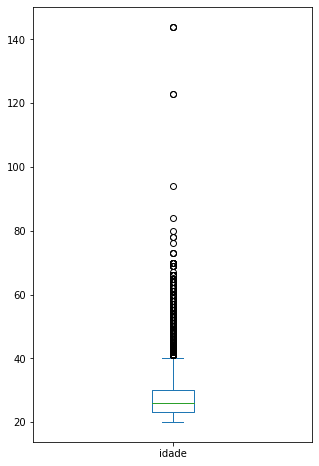

In [28]:
ax = dados_alura['idade'].plot.box(figsize=(5, 8))
ax

## Há valores incompatíveis com a realidade, com idades maiores que 100 anos, vamos avaliar no dataset.

In [29]:
dados_alura.query('idade >= 80')

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
1757,wKgCi7Pn-1maM,vbpqtIgu-DeNT,N2vBepDa-r5nB,financiado,pessoal,A,84.0,94800.0,2.0,10000.0,7.51,0.11,24.0,0.0,0.0
4848,LJGuDrtT-EcI2,kYEWxW78-2ar5,JyMoSMmv-pwJr,alugado,saude,C,94.0,24000.0,1.0,6500.0,NaN,0.27,27.0,0.0,0.0
13850,ZpG5kPRS-oxN1,stIhYc8k-9Ab3,i1iyBOhw-6pKW,financiado,pessoal,C,144.0,6000000.0,12.0,5000.0,12.73,0.00,25.0,0.0,0.0
17272,9KZ6344x-RDHc,QparJ7gL-UOpI,0LJQXgp9-ktB2,alugado,ensino,B,123.0,80004.0,2.0,20400.0,10.25,0.25,3.0,0.0,0.0
22137,5fi1GWSO-oQcb,TmOA2QC6-xk2y,171BCjoL-pNcN,financiado,ensino,B,144.0,200000.0,4.0,6000.0,11.86,0.03,2.0,0.0,0.0
23737,PBb5WjDd-yZ2g,gL7g2kD9-8j1d,HrMLbWNC-hr6F,alugado,risco,B,123.0,78000.0,7.0,20000.0,NaN,0.26,4.0,0.0,0.0
29224,TwZcn29T-CPBK,zxp71uiE-Zc2v,rQosgL1U-rxe8,alugado,risco,C,144.0,250000.0,4.0,4800.0,13.57,0.02,3.0,0.0,0.0
33824,PlzP8ZDC-SuYv,YUOmBdhP-9mPI,maIBtz9d-A2L6,alugado,saude,B,80.0,64000.0,7.0,6800.0,11.71,0.11,25.0,0.0,0.0


## Existem valores bem fora da realidade, no entanto, tentar atribuir algum valor alternativo aqui será mera especulação. Como são apenas 5 linhas, acredito que faz mais sentido apagar estes dados.

<AxesSubplot:>

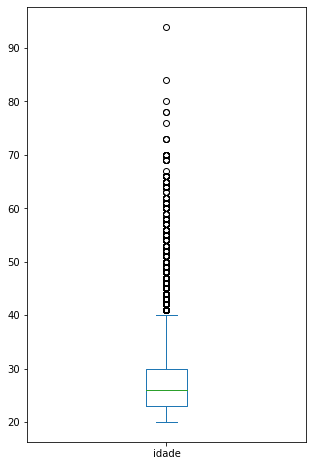

In [30]:
dados_alura.drop([13850, 17272, 22137, 23737, 29224], inplace = True)
ax = dados_alura['idade'].plot.box(figsize=(5, 8))
ax

## Agora temos que lidar com outro problema relacionado as idades, os 'outliers'. Mas será que pensando em idades eles são um problema? Afinal o nosso desafio tem suas especificidades. Vamos manter os 'outliers' e depois avaliar os resultados e soluções como o https://scikit-learn.org/stable/modules/impute.html . Os dados NAN vou substituir com o método 'ffill' mais uma vez.

In [31]:
dados_alura.idade.fillna(method = 'ffill', inplace = True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo         0
grupo                     0
idade                     0
salario                 335
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3625
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

<AxesSubplot:>

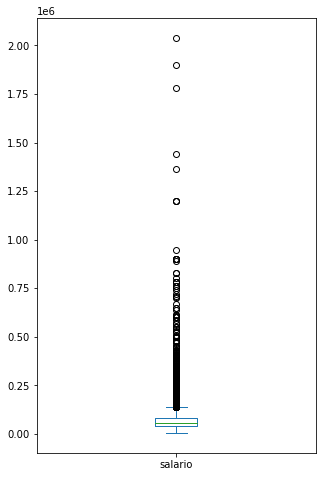

In [32]:
ax = dados_alura['salario'].plot.box(figsize=(5, 8))
ax

In [33]:
dados_alura['salario'].max()

2039784.0

In [34]:
dados_alura['salario'].min()

4000.0

## A amplitude salarial é altíssima, e tanto o menor salário, como o maior salário levantam suspeitas. Vamos avaliar no dataset a faixa dos maiores e dos menores.

In [35]:
dados_alura.query('salario < 12000')

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
270,pMwsMDHR-aOTx,PqP1ejuL-Ki6o,Z47p22ls-rt6I,alugado,quitar,C,30.0,9600.0,1.0,1500.0,12.73,0.16,9.0,1.0,1.0
519,rij7LfZ6-gKlT,gitwnBvm-EdRA,ZMhYQu6g-ZTzt,proprio,risco,B,21.0,9600.0,0.0,1200.0,10.99,0.13,4.0,0.0,0.0
748,dAkbvPCO-94w5,EcDvQxWo-dD6N,4UIOgsXG-2C2j,proprio,ensino,A,23.0,8628.0,NaN,1400.0,NaN,0.16,2.0,0.0,1.0
1163,IlkvWioK-6Eua,37TJiHvy-WZbl,zP77ryMT-HpNL,proprio,risco,A,23.0,11000.0,0.0,1400.0,9.32,0.13,4.0,0.0,0.0
1229,zNNB28ty-Ab1Y,ZjisXyD4-bwRD,1KHpytBF-Zs49,outro,ensino,C,21.0,11389.0,5.0,4000.0,12.84,0.35,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33056,EIoCjQtc-jOdO,sHvEnhLK-zPnI,b1mnGznO-Em9k,alugado,ensino,A,21.0,9600.0,0.0,1750.0,8.94,0.18,2.0,0.0,1.0
33524,SPxsytwj-lqH7,jSKxT0zU-ep3c,wZFUgNCM-iHyz,alugado,quitar,B,29.0,9600.0,1.0,2600.0,12.69,0.27,7.0,0.0,1.0
33762,x8ovO8cg-Yhgg,x8v512L7-ET4m,v8W6fnE7-HWxY,alugado,pessoal,A,30.0,9600.0,NaN,1800.0,5.99,0.19,8.0,0.0,1.0
33944,9q25v5Um-D62F,C3wh58k4-jiE4,dJSAZtnF-BINF,proprio,risco,C,53.0,4888.0,0.0,1400.0,NaN,0.29,28.0,1.0,1.0


In [36]:
dados_alura.query('salario > 1200000')

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
10582,yKW69ZH0-8fRO,FuSbvgl5-yHkT,xPC00W9r-S5tf,financiado,pessoal,A,60.0,1900000.0,5.0,1500.0,NaN,0.00,21.0,0.0,0.0
27729,aE7w8IOD-j4fO,Nxmvy5nl-CWZh,FbZ1CZED-Z81F,alugado,risco,C,42.0,2039784.0,0.0,8450.0,12.29,0.00,15.0,1.0,0.0
32532,Xf64MeTC-wLrZ,SgtNfw6F-Eg7C,SzKsZGmh-cBcI,financiado,risco,A,47.0,1362000.0,9.0,6600.0,7.74,0.00,17.0,0.0,0.0
34348,0mXmTfEa-BiSc,G93ltKZ6-K9Rp,pa6aI9vy-GDjc,financiado,quitar,A,44.0,1440000.0,7.0,6400.0,7.40,0.00,15.0,0.0,0.0
34459,IG9omzMB-tLsJ,A9fIQA2G-Fppb,23e8Y9t5-1yuU,alugado,ensino,C,63.0,1782000.0,13.0,12025.0,14.27,0.01,30.0,0.0,0.0


## São 148 registros de salário abaixo de 12000/ano e 5 acima de 1200000/ano. Considerando a possibilidade de tratamento de 'outliers' vamos manter os dados como estão, e depois testaremos os resultados nos modelos.

In [37]:
dados_alura.salario.fillna(method = 'ffill', inplace = True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo         0
grupo                     0
idade                     0
salario                   0
tempo_trabalhando      1254
valor_emprestimo        331
juros                  3625
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

## Agora vamos para o tempo trabalhando.

<AxesSubplot:>

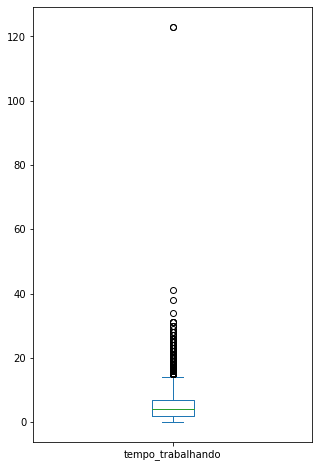

In [38]:
ax = dados_alura['tempo_trabalhando'].plot.box(figsize=(5, 8))
ax

## Tem alguém trabalhando demais aqui, além de mim!

In [39]:
dados_alura.query('tempo_trabalhando > 40')

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
8200,Iq2tUDFv-KoMN,A7cXcQop-iPhK,dXnCE14w-zvoo,alugado,pessoal,D,22.0,59000.0,123.0,35000.0,16.02,0.59,3.0,1.0,1.0
10207,RRkSuNxX-mdO4,r1R0GO2h-Q6iF,wB7IjgA2-0KQ1,alugado,saude,A,78.0,48000.0,41.0,3000.0,7.51,0.06,25.0,0.0,0.0
21177,Uwx2tvkA-YzSa,OHY8AzCm-KBlB,Q05bbZGi-GgQO,financiado,risco,A,21.0,192000.0,123.0,20000.0,6.54,0.10,4.0,0.0,0.0


## Como os dados são bem inconsistentes podem ser apagados.

<AxesSubplot:>

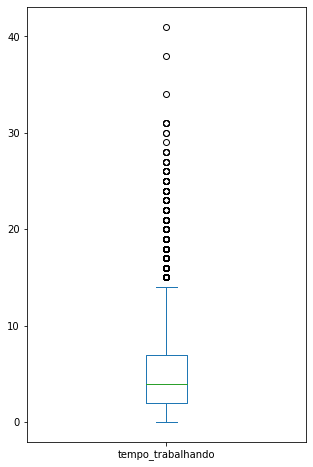

In [40]:
dados_alura.drop([8200, 21177], inplace = True)
ax = dados_alura['tempo_trabalhando'].plot.box(figsize=(5, 8))
ax

## Agora parece mais razoável.

## Vamos completar os dados faltantes com o método 'ffill' mais uma vez.

In [41]:
dados_alura.tempo_trabalhando.fillna(method = 'ffill', inplace = True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo         0
grupo                     0
idade                     0
salario                   0
tempo_trabalhando         0
valor_emprestimo        331
juros                  3625
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

<AxesSubplot:>

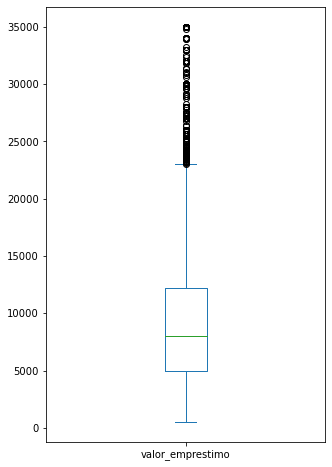

In [42]:
ax = dados_alura['valor_emprestimo'].plot.box(figsize=(5, 8))
ax

In [43]:
dados_alura.valor_emprestimo.max()

35000.0

In [44]:
dados_alura.valor_emprestimo.min()

500.0

In [45]:
dados_alura.valor_emprestimo.mean()

9589.269921222947

In [46]:
dados_alura.query('valor_emprestimo < 1000')

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
1454,TQeP8Ymk-gyIg,L8jbsjQI-AiqI,mGE8gCR0-TPY3,financiado,risco,A,21.0,35000.0,2.0,800.0,7.37,0.02,3.0,0.0,0.0
1959,n1Ea2LII-UdjI,2tIducPL-TYmP,yg2rWmwP-8NQD,alugado,saude,B,30.0,23000.0,1.0,950.0,NaN,0.04,6.0,0.0,0.0
6643,0SHjkHAj-It6m,hYWun3O1-LMLw,euilzptx-E4qH,alugado,quitar,C,25.0,19000.0,0.0,750.0,12.29,0.04,4.0,1.0,0.0
6849,miN7eRuK-lWqr,TxJXSjCU-edTR,WxA093oT-IaDL,alugado,saude,C,26.0,19500.0,0.0,500.0,11.41,0.03,2.0,0.0,0.0
8088,kWQduvA2-36dK,zQvoXKSh-OaPS,ZfhrtTzc-QxaR,alugado,quitar,A,33.0,18000.0,0.0,500.0,NaN,0.03,6.0,0.0,0.0
12799,N7PCvlZS-Gleg,Hb4QAJxo-kW1a,BigPGdFB-dmIc,alugado,ensino,C,21.0,19000.0,0.0,700.0,12.29,0.04,2.0,0.0,0.0
15041,r1bj0Z5a-nK17,eXn5hvhB-vysE,i7uPQphz-nRRH,financiado,pessoal,B,22.0,26000.0,3.0,500.0,10.46,0.02,4.0,0.0,0.0
18174,PRJ4cWmf-Z8Lq,r5w9tCNp-D07T,10qUhJvD-4WkK,financiado,reforma,B,26.0,7904.0,0.0,500.0,10.71,0.06,3.0,0.0,0.0
18843,mnudczeA-0dJA,jQcHpJGX-1Cbu,Y63x65wv-zsKF,proprio,saude,A,25.0,57000.0,4.0,900.0,8.63,0.02,4.0,0.0,0.0
23260,JuwpyttT-DISj,JzA3iqYg-H9fy,nFTLuc1S-jGgy,alugado,quitar,A,27.0,12000.0,1.0,725.0,7.37,0.06,6.0,0.0,0.0


In [47]:
dados_alura.query('valor_emprestimo > 30000')

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
156,tE2MMb33-ZtT7,j6eaWF98-rxdq,oJM66DQo-WPHF,alugado,reforma,D,34.0,89000.0,3.0,35000.0,18.25,0.39,8.0,0.0,1.0
221,GcZhtond-jP4s,WWSKshGg-oppj,Fwt4od5n-v70Y,alugado,ensino,E,27.0,258000.0,11.0,35000.0,18.64,0.14,7.0,1.0,1.0
276,OQjTZz3f-461u,A8p05RvB-qMW5,QwXcNx4l-93C1,financiado,risco,A,26.0,70000.0,9.0,35000.0,7.90,0.50,2.0,0.0,0.0
293,afUGYAJA-8THN,Xtexq4d0-pd79,SY92sdBq-Xz1c,financiado,saude,D,23.0,72250.0,7.0,35000.0,15.99,0.41,2.0,0.0,1.0
1000,ePGnRsZ9-Xkxv,2tF2XE85-tC3b,cKbx2N4L-eLcW,alugado,pessoal,D,22.0,80000.0,3.0,33950.0,14.54,0.42,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33833,jisbFf33-zxKq,HhUumu7j-tqa8,7cTeZmxU-Kaid,financiado,reforma,A,24.0,96000.0,8.0,35000.0,7.90,0.36,4.0,0.0,0.0
34000,2qNsz1qK-xkA1,Kzthf8Xj-zHM1,hxKlcDu2-KgUZ,financiado,pessoal,C,30.0,144000.0,12.0,35000.0,12.68,0.24,8.0,0.0,0.0
34140,EqJIO4KP-DOZv,WNprFZzJ-9wMp,bwQP38T2-uMLA,financiado,saude,B,30.0,70000.0,5.0,31825.0,12.69,0.45,8.0,0.0,0.0
34267,7Jl4id0u-aGqg,JRkHfFdP-UKWX,j3UUCRF7-iTJB,alugado,reforma,B,65.0,76000.0,3.0,35000.0,10.99,0.46,28.0,0.0,1.0


## Bom, considerando as características dos nossos dados é complicado apagar informações nesta categoria nesta categoria. Vamos mais uma vez completar com o método 'ffill' .

In [48]:
dados_alura.valor_emprestimo.fillna(method = 'ffill', inplace = True)
dados_alura.isnull().sum()

id_cliente                0
id_emprestimo             0
id_historico              0
tipo_imovel               0
motivo_emprestimo         0
grupo                     0
idade                     0
salario                   0
tempo_trabalhando         0
valor_emprestimo          0
juros                  3625
emp_sal                 315
tempo_cliente             0
INADIMPLENCIA           366
RISCO_INADIMPLENCIA     343
dtype: int64

## Vamos aos juros, que provavelmente deve seguir a mesma metodologia.

<AxesSubplot:>

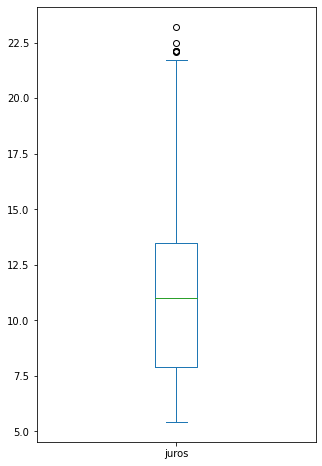

In [49]:
ax = dados_alura['juros'].plot.box(figsize=(5, 8))
ax

## Pra encurtar vamos já partir pra 'ffill' no resto dos dados.

In [127]:
dados_alura.fillna(method = 'ffill', inplace = True)
dados_alura.isnull().sum()

id_cliente             0
id_emprestimo          0
id_historico           0
tipo_imovel            0
motivo_emprestimo      0
grupo                  0
idade                  0
salario                0
tempo_trabalhando      0
valor_emprestimo       0
juros                  0
emp_sal                0
tempo_cliente          0
INADIMPLENCIA          0
RISCO_INADIMPLENCIA    0
dtype: int64

In [128]:
dados_alura.to_csv('dados_alura.csv', index = False)

## Bom, vamos tentar os dados sem null e ver como fica. Os dados ainda possuem dados em branco, que é diferente de dados nulos. por isso vamos usar o 'dropna()' para eliminar de vez os dados em branco. Depois vamos aplicar uma função pra retirar os 'outliers'.

In [52]:
dados_alura_semnull

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21,60000,2,8000,11.26,0.13,3,0.0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40,70000,6,18000,7.90,0.26,14,0.0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29,115000,3,22000,15.23,0.19,7,1.0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26,84996,0,9000,11.26,0.11,2,0.0,0
4,OQXEoNPl-hL0f,QxdBboWP-KKFh,Ue0IMCKa-d0AQ,proprio,ensino,A,23,24000,7,5000,7.49,0.21,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28879,rLWRUuiC-gZah,teotm42r-7RmP,suYzmZPZ-LZ7p,financiado,pessoal,A,60,37200,2,10000,6.54,0.27,27,0.0,1
28880,5PYYQrGb-kL7i,eKFBKFUg-EPMg,Y5h04JQz-UlnH,alugado,ensino,B,22,28800,6,8000,11.49,0.28,2,0.0,0
28881,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27,39600,11,4800,6.76,0.12,9,0.0,0
28882,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30,39996,8,10000,12.73,0.25,6,0.0,0


In [53]:
dados_alura_semnull.dropna(inplace = True)
dados_alura_semnull.isnull().sum()

id_cliente             0
id_emprestimo          0
id_historico           0
tipo_imovel            0
motivo_emprestimo      0
grupo                  0
idade                  0
salario                0
tempo_trabalhando      0
valor_emprestimo       0
juros                  0
emp_sal                0
tempo_cliente          0
INADIMPLENCIA          0
RISCO_INADIMPLENCIA    0
dtype: int64

In [54]:
dados_alura_semnull.to_csv('dados_alura_semnull.csv', index = False)

In [55]:
dados_alura_semnull.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'tipo_imovel',
       'motivo_emprestimo', 'grupo', 'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'],
      dtype='object')

In [56]:
dados_semnull_numericos = dados_alura_semnull[['idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente', 'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [57]:
dados_alura_numericos = dados_alura[['idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente', 'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [58]:
from scipy import stats
from scipy.stats import zscore
z_scores = stats.zscore(dados_semnull_numericos)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dados_sem_outliers = dados_semnull_numericos[filtered_entries]

dados_sem_outliers

,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,21,60000,2,8000,11.26,0.13,3,0.0,0
1,40,70000,6,18000,7.90,0.26,14,0.0,0
2,29,115000,3,22000,15.23,0.19,7,1.0,0
3,26,84996,0,9000,11.26,0.11,2,0.0,0
4,23,24000,7,5000,7.49,0.21,2,0.0,0
...,...,...,...,...,...,...,...,...,...
28878,24,69000,7,5200,17.19,0.08,2,0.0,0
28880,22,28800,6,8000,11.49,0.28,2,0.0,0
28881,27,39600,11,4800,6.76,0.12,9,0.0,0
28882,30,39996,8,10000,12.73,0.25,6,0.0,0


In [59]:
z_scores = stats.zscore(dados_alura_numericos)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dados_alura_sem_outliers = dados_alura_numericos[filtered_entries]

dados_alura_sem_outliers

,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA


In [60]:
dados_alura_sem_null_sem_outlier = dados_alura_semnull[['id_cliente', 'id_emprestimo', 'id_historico', 'tipo_imovel',
       'motivo_emprestimo', 'grupo']].merge(dados_sem_outliers, right_index = True, left_index=True)
dados_alura_sem_null_sem_outlier.head()

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21,60000,2,8000,11.26,0.13,3,0.0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40,70000,6,18000,7.90,0.26,14,0.0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29,115000,3,22000,15.23,0.19,7,1.0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26,84996,0,9000,11.26,0.11,2,0.0,0
4,OQXEoNPl-hL0f,QxdBboWP-KKFh,Ue0IMCKa-d0AQ,proprio,ensino,A,23,24000,7,5000,7.49,0.21,2,0.0,0


In [61]:
dados_alura_sem_outliers = dados_alura[['id_cliente', 'id_emprestimo', 'id_historico', 'tipo_imovel',
       'motivo_emprestimo', 'grupo']].merge(dados_alura_sem_outliers, right_index = True, left_index=True)
dados_alura_sem_outliers.head()

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA


In [62]:
dados_alura_sem_null_sem_outlier.isnull().sum()

id_cliente             0
id_emprestimo          0
id_historico           0
tipo_imovel            0
motivo_emprestimo      0
grupo                  0
idade                  0
salario                0
tempo_trabalhando      0
valor_emprestimo       0
juros                  0
emp_sal                0
tempo_cliente          0
INADIMPLENCIA          0
RISCO_INADIMPLENCIA    0
dtype: int64

In [63]:
dados_alura_sem_null_sem_outlier.to_csv('dados_alura_sem_null_sem_outlier.csv', index = False)

In [64]:
dados_alura_sem_outliers.to_csv('dados_alura_sem_outliers.csv', index = False)

In [65]:
dados_alura_sem_null_sem_outlier.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'tipo_imovel',
       'motivo_emprestimo', 'grupo', 'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'],
      dtype='object')

<AxesSubplot:>

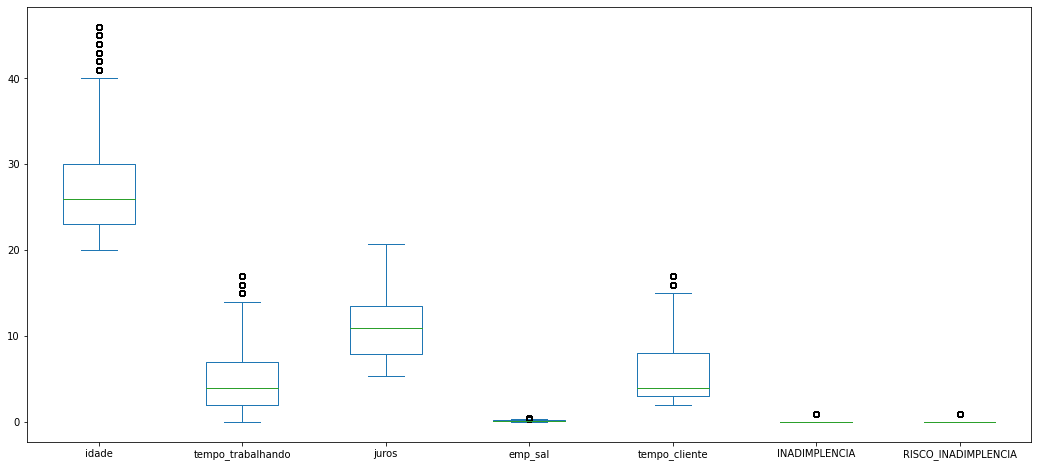

In [66]:
ax = dados_alura_sem_null_sem_outlier[['idade', 'tempo_trabalhando',
       'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']].plot.box(figsize=(18, 8))
ax

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [68]:
dados_alura.head()

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21.00,60000.00,2.00,8000.00,11.26,0.13,3.00,0.00,0.00
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40.00,70000.00,6.00,18000.00,7.90,0.26,14.00,0.00,0.00
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29.00,115000.00,3.00,22000.00,15.23,0.19,7.00,1.00,0.00
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26.00,84996.00,0.00,9000.00,11.26,0.11,2.00,0.00,0.00
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,alugado,quitar,A,23.00,54500.00,2.00,8000.00,11.26,0.15,2.00,0.00,0.00


In [69]:
dados_alura.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'tipo_imovel',
       'motivo_emprestimo', 'grupo', 'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'],
      dtype='object')

In [70]:
df_dummies = pd.get_dummies(dados_alura.drop(['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34496,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
34497,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
34498,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
34499,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [71]:
df_modificado = dados_alura[['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [72]:
dados_alura_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_alura_final.head()

,id_cliente,id_emprestimo,id_historico,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,21.00,60000.00,2.00,8000.00,11.26,0.13,3.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,40.00,70000.00,6.00,18000.00,7.90,0.26,14.00,0.00,0.00,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,29.00,115000.00,3.00,22000.00,15.23,0.19,7.00,1.00,0.00,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26.00,84996.00,0.00,9000.00,11.26,0.11,2.00,0.00,0.00,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,23.00,54500.00,2.00,8000.00,11.26,0.15,2.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [82]:
dados_alura_final.fillna(method = 'ffill', inplace = True)

In [83]:
dados_alura_final.isnull().sum()

id_cliente                   0
id_emprestimo                0
id_historico                 0
idade                        0
salario                      0
tempo_trabalhando            0
valor_emprestimo             0
juros                        0
emp_sal                      0
tempo_cliente                0
INADIMPLENCIA                0
RISCO_INADIMPLENCIA          0
tipo_imovel_alugado          0
tipo_imovel_financiado       0
tipo_imovel_outro            0
tipo_imovel_proprio          0
motivo_emprestimo_ensino     0
motivo_emprestimo_pessoal    0
motivo_emprestimo_quitar     0
motivo_emprestimo_reforma    0
motivo_emprestimo_risco      0
motivo_emprestimo_saude      0
grupo_A                      0
grupo_B                      0
grupo_C                      0
grupo_D                      0
grupo_E                      0
grupo_F                      0
grupo_G                      0
dtype: int64

In [84]:
X = dados_alura_final.drop(['id_cliente', 'id_emprestimo', 'id_historico', 'RISCO_INADIMPLENCIA'], axis = 1)
y = dados_alura_final['RISCO_INADIMPLENCIA']

In [85]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)

In [86]:
dados_final = pd.concat([X, y], axis=1)
dados_final

,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G,RISCO_INADIMPLENCIA
0,21.00,60000.00,2.00,8000.00,11.26,0.13,3.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.00
1,40.00,70000.00,6.00,18000.00,7.90,0.26,14.00,0.00,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.00
2,29.00,115000.00,3.00,22000.00,15.23,0.19,7.00,1.00,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.00
3,26.00,84996.00,0.00,9000.00,11.26,0.11,2.00,0.00,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.00
4,23.00,54500.00,2.00,8000.00,11.26,0.15,2.00,0.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53917,26.53,30000.00,1.00,14500.00,15.65,0.48,5.69,0.39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00
53918,22.00,14400.00,0.00,4472.09,11.24,0.31,4.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00
53919,22.42,54210.44,2.79,22929.59,8.44,0.42,2.21,0.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00
53920,30.00,30809.00,1.00,11200.00,11.99,0.36,7.18,0.00,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00


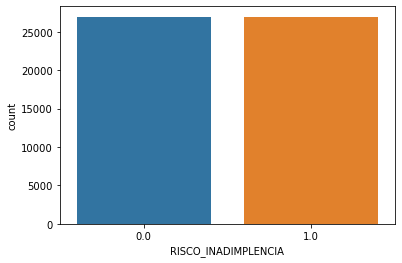

In [87]:
ax = sns.countplot(x='RISCO_INADIMPLENCIA', data=dados_final)

In [88]:
X = dados_final.drop('RISCO_INADIMPLENCIA', axis = 1)
y = dados_final['RISCO_INADIMPLENCIA']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[-1.11961969e+00, -8.06301165e-04, -6.67683117e-01, ...,
        -1.55057551e-01, -7.27650584e-02, -3.87869786e-02],
       [ 2.11881377e+00,  2.06987124e-01,  3.92099745e-01, ...,
        -1.55057551e-01, -7.27650584e-02, -3.87869786e-02],
       [ 2.43931243e-01,  1.14205754e+00, -4.02737402e-01, ...,
        -1.55057551e-01, -7.27650584e-02, -3.87869786e-02],
       ...,
       [-8.77152327e-01, -1.21109614e-01, -4.58715703e-01, ...,
        -1.55057551e-01, -7.27650584e-02, -3.87869786e-02],
       [ 4.14375110e-01, -6.07376090e-01, -9.32628833e-01, ...,
        -1.55057551e-01, -7.27650584e-02, -3.87869786e-02],
       [-4.37844223e-01, -6.44965921e-01,  1.07573401e+00, ...,
        -1.55057551e-01, -7.27650584e-02, -3.87869786e-02]])

In [91]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123, stratify = y)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier()

In [94]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier()

In [95]:
predito_knn = knn.predict(X_teste)

In [96]:
predito_knn

array([1., 1., 0., ..., 1., 1., 1.])

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
print(confusion_matrix(y_teste, predito_knn))

[[7769  320]
 [ 917 7171]]


In [99]:
from sklearn.metrics import accuracy_score

In [100]:
print(accuracy_score(y_teste, predito_knn))

0.9235334116338011


In [101]:
from sklearn.metrics import precision_score

In [102]:
print(precision_score(y_teste, predito_knn))

0.9572820718195167


In [103]:
from sklearn.metrics import recall_score

In [104]:
print(recall_score(y_teste, predito_knn))

0.88662215628091


In [105]:
np.median(X_treino)

-0.352146637184597

In [106]:
from sklearn.naive_bayes import BernoulliNB

In [107]:
bnb = BernoulliNB(binarize=-0.3452662674363792)

In [108]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.3452662674363792)

In [109]:
predito_BNb = bnb.predict(X_teste)

In [110]:
predito_BNb

array([1., 0., 1., ..., 1., 1., 1.])

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight = 'balanced')

In [113]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [114]:
dtc.feature_importances_

array([0.03008036, 0.09889937, 0.03678338, 0.03372694, 0.13999147,
       0.17184833, 0.02251107, 0.00874133, 0.0492831 , 0.02061181,
       0.00156233, 0.02814691, 0.01738654, 0.02114618, 0.00376955,
       0.01857845, 0.02233764, 0.00646346, 0.05239105, 0.0707031 ,
       0.12093768, 0.01382174, 0.0072406 , 0.00239784, 0.00063981])

In [115]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [116]:
predito_ArvoreDecisao

array([1., 1., 0., ..., 1., 1., 1.])

In [117]:
print(confusion_matrix(y_teste, predito_BNb))

[[6510 1579]
 [1603 6485]]


In [118]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[7327  762]
 [ 655 7433]]


In [119]:
print(accuracy_score(y_teste, predito_BNb))

0.803300982876924


In [120]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.9124065030598999


In [121]:
print(precision_score(y_teste, predito_BNb))

0.8041914682539683


In [122]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.9070164734594265


In [123]:
print(recall_score(y_teste, predito_BNb))

0.8018051434223541


In [124]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.9190158259149357


In [125]:
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.9572820718195167
Modelo Bernoulli de Naive Bayes:  0.8041914682539683
Modelo Árvore de Decisão:  0.9070164734594265
